# <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques">Предсказание цен домов</a>

**Задача:***
``Задача состовит в прогнозировании цен за дома, на основе данных.``

**Описание файлов**: 

- ``train.csv`` -  обучающий набор.
- ``test.csv`` -  тестовый набор.
- ``sample_submission.csv ``  - файл с примерами представления в правильном формате.

**Поля данных**: 
- SalePrice - цена продажи объекта в долларах. Это целевая переменная, которую вы пытаетесь предсказать.
- MSSubClass: класс здания
- MSZoning: Общая классификация зонирования
- LotFrontage: Линейные ноги улицы, соединенной с участком
- LotArea: Размер лота в квадратных футах.
- Улица: Тип подъездной дороги
- Аллея: Тип подъезда к аллее
- LotShape: Общая форма собственности
- LandContour: Плоскостность собственности
- Утилиты: Тип имеющихся утилит
- LotConfig: Конфигурация лота
- LandSlope: склон собственности
- Район: Физические места в пределах города Эймс.
- Условие 1: Близость к главной дороге или железной дороге
- Условие 2: Близость к главной дороге или железной дороге (если есть вторая)
- BldgType: Тип жилья
- HouseStyle: Стиль жилища
- Общее качество: Общее качество материалов и отделки
- GeneralCond: Общая оценка состояния
- Год постройки: Дата постройки.
- YearRemodAdd: Дата реконструкции
- RoofStyle: Тип крыши
- RoofMatl: Материал крыши
- Exterior1st: Наружное покрытие дома.
- Exterior2nd: Наружное покрытие дома (если используется более одного материала).
- MasVnrType: Тип облицовки кладки
- MasVnrArea: Площадь облицовки каменной кладкой в ​​квадратных футах.
- ExterQual: Качество наружных материалов
- ExterCond: Текущее состояние материала снаружи.
- Фундамент: Тип фундамента
- BsmtQual: Высота подвала
- BsmtCond: Общее состояние подвала.
- BsmtExposure: Подвальные стены на уровне сада или выхода
- BsmtFinType1: Качество готовой площади подвала
- BsmtFinSF1: Готовые квадратные футы типа 1
- BsmtFinType2: Качество второй законченной области (если есть)
- BsmtFinSF2: Готовые квадратные футы типа 2
- BsmtUnfSF: Незавершенные квадратные футы подвала
- TotalBsmtSF: Общая площадь подвала в квадратных футах
- Отопление: Тип отопления
- HeatingQC: Качество и состояние отопления
- CentralAir: Центральное кондиционирование
- Электрика: электрическая система
- 1stFlrSF: квадратные футы на первом этаже
- 2ndFlrSF: Площадь второго этажа в квадратных футах
- LowQualFinSF: квадратные футы с отделкой низкого качества (все этажи)
- GrLivArea: квадратные футы жилой площади надземного уровня
- BsmtFullBath: Полные ванные комнаты в подвале
- BsmtHalfBath: полуподвальные ванные комнаты
- FullBath: Полные ванные комнаты выше уровня
- HalfBath: Полуванны выше уровня
- Спальня: Количество спален над цокольным этажом
- Кухня: Количество кухонь
- KitchenQual: Качество кухни
- TotRmsAbvGrd: Общее количество комнат выше уровня (без ванных комнат)
- Функциональность: Рейтинг функциональности дома
- Камины: Количество каминов
- FireplaceQu: качество камина
- GarageType: расположение гаража
- GarageYrBlt: Год постройки гаража
- GarageFinish: Внутренняя отделка гаража.
- GarageCars: Размер гаража по вместимости машины
- GarageArea: Размер гаража в квадратных футах.
- GarageQual: качество гаража
- GarageCond: Состояние гаража
- PavedDrive: подъездная дорога с твердым покрытием
- WoodDeckSF: Площадь деревянного настила в квадратных футах
- OpenPorchSF: Площадь открытой веранды в квадратных футах
- EnclosedPorch: Площадь крыльца в квадратных футах.
- 3SsnPorch: Площадь крыльца на три сезона в квадратных футах
- ScreenPorch: Площадь крыльца экрана в квадратных футах
- PoolArea: Площадь бассейна в квадратных футах.
- PoolQC: качество бассейна
- Забор: качество забора
- MiscFeature: прочие функции, не относящиеся к другим категориям
- MiscVal:  Значение разной функции
- MoSold: месяц продажи
- YrSold: Год продажи
- SaleType: Тип продажи
- SaleCondition: Состояние продажи

Подключим все необходимые библиотеки для обработки данных

In [1]:
import gc # сборщик мусора для удаления ненужных данных в оперативной памяти
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from collections import Counter
from sklearn.preprocessing import StandardScaler
import os
import xgboost
from sklearn import model_selection
import ast
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Проверка данных

Загружаем наши данные, просмотрим их и проверяем на наличие пустых значений

In [2]:
train = pd.read_csv(r'./train.csv')
test = pd.read_csv(r'./test.csv')
sample_sub = pd.read_csv(r'./sample_submission.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
sample_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# Получение информации о данных

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Визуализация

Карта корреляции, чтобы увидеть, как функции соотносятся с SalePrice

<AxesSubplot:>

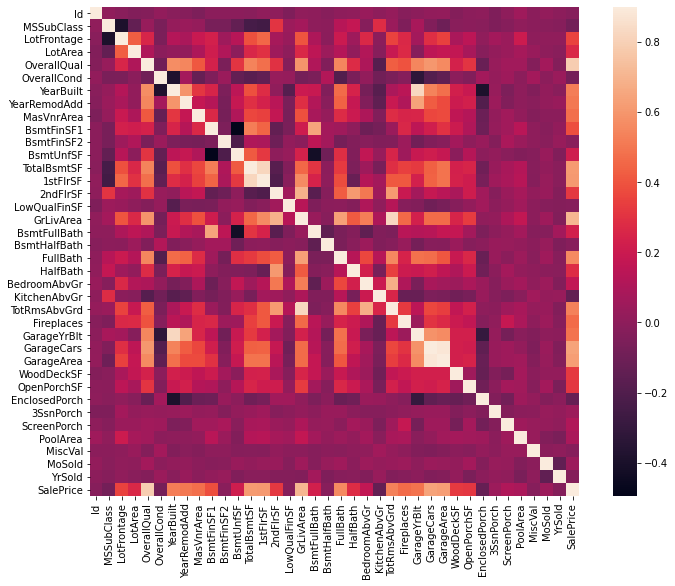

In [8]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

Гистограмма цен.

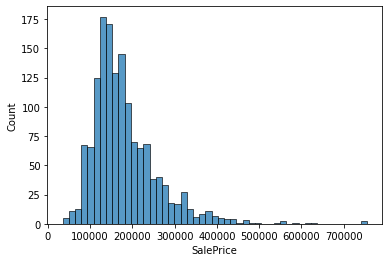

In [9]:
sns.histplot(train['SalePrice']);

Зависимость цены от площади.

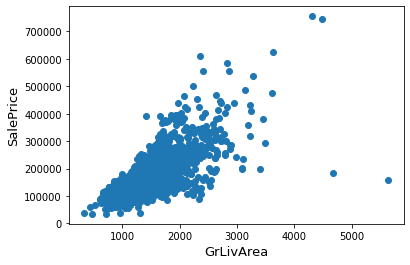

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# Подготавливаем данные для обучения моделей

In [11]:
X_train = train.drop(['SalePrice'], axis=1)
Y_train = train['SalePrice']
X_test = test
X_test_id = X_test["Id"]

In [13]:
columns = ['MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [14]:
def One_hot_encoding(columns):
    df_final=final_df
    i=0
    for fields in columns:
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [15]:
X_train= X_train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)
X_test= X_test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [16]:
final_df = X_train

In [17]:
X_train = One_hot_encoding(columns)

In [18]:
final_df = X_test

In [19]:
X_test = One_hot_encoding(columns)

In [20]:
X_train =X_train.loc[:,~X_train.columns.duplicated()]
X_test =X_test.loc[:,~X_test.columns.duplicated()]

In [21]:
X_train = X_train.reindex(sorted(X_train.columns), axis=1)
X_test = X_test.reindex(sorted(X_test.columns), axis=1)

In [22]:
model_error = {}

# Создание моделей

In [23]:
import xgboost
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Разбиваем данные train выборки на выборку для обучения и отложенную выборку для проверки качества моделей.

In [24]:
X_train_check, X_test_check, y_train_check, y_test_check = train_test_split(X_train, Y_train, test_size=0.33, random_state=42) # нормализованные данные с использованием метода обработки категориальных признаков - get_dummies

In [25]:
X_train_check.fillna(X_train_check.mean(), inplace=True)
X_test_check.fillna(X_test_check.mean(), inplace=True)
X_train_check.fillna(0)
X_test_check.fillna(0)

c:\python\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,1.5Unf,1Story,1stFlrSF,2.5Fin,2.5Unf,2Story,2fmCon,2ndFlrSF,3SsnPorch,AdjLand,...,Wd Shng,WdShake,WdShing,WdShngl,Wood,WoodDeckSF,Y,YearBuilt,YearRemodAdd,YrSold
892,0,1,1068,0,0,0,0,0,0,0,...,0,0,0,0,0,192,1,1963,2003,2006
1105,0,0,1500,0,0,1,0,1122,0,0,...,0,0,0,0,0,186,1,1994,1995,2010
413,0,1,1028,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1927,1950,2010
522,0,0,1004,0,0,0,0,660,0,0,...,0,0,0,0,0,0,1,1947,1950,2006
1036,0,1,1620,0,0,0,0,0,0,0,...,0,0,0,0,0,228,1,2007,2008,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0,0,720,0,0,0,0,551,0,0,...,0,0,0,0,0,0,1,1948,1950,2008
390,0,0,961,0,0,0,0,406,0,0,...,0,0,0,0,0,0,1,1900,1950,2008
1409,0,0,1236,0,0,1,0,857,0,0,...,0,0,0,0,0,364,1,1986,1991,2008
847,0,1,864,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1972,1972,2009


# LinearRegression

Линейная регрессия — используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной y от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) x с линейной функцией зависимости

In [28]:
%%time
model_lr = LinearRegression()
model_lr.fit(X_train_check, y_train_check)

Wall time: 197 ms


LinearRegression()

In [29]:
pred_lr = model_lr.predict(X_test_check)
lr_rmse = np.sqrt(mean_squared_error(y_test_check, pred_lr))
model_error['LinearRegression'] = lr_rmse
print(lr_rmse)

39386.706846122965


# SGDRegressor

In [31]:
%%time
model_sgd = SGDRegressor()
model_sgd.fit(X_train_check, y_train_check)

Wall time: 399 ms


SGDRegressor()

In [32]:
pred_sgd = model_sgd.predict(X_test_check)
sgd_rmse = np.sqrt(mean_squared_error(y_test_check, pred_sgd))
model_error['SGDRegressor'] = sgd_rmse
print(sgd_rmse)

7.982391843968525e+16


# Lasso/ Ridge

## Ridge

Гребневая регрессия или ридж-регрессия — один из методов понижения размерности. Применяется для борьбы с избыточностью данных, когда независимые переменные коррелируют друг с другом, вследствие чего проявляется неустойчивость оценок коэффициентов многомерной линейной регрессии.

In [33]:
%%time
model_ridge = Ridge()
model_ridge.fit(X_train_check, y_train_check)

Wall time: 475 ms


Ridge()

In [34]:
pred_ridge = model_ridge.predict(X_test_check)
ridge_rmse = np.sqrt(mean_squared_error(y_test_check, pred_ridge))
model_error['Ridge'] = ridge_rmse
print(ridge_rmse)

34176.85979024935


## Lasso 

Лассо - это метод регрессионного анализа, который выполняет как выбор переменных, так и регуляризацию, чтобы повысить точность прогнозирования и интерпретируемость создаваемой статистической модели.

In [57]:
%%time
model_lasso = Lasso()
model_lasso.fit(X_train_check, y_train_check)

Wall time: 296 ms


c:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246677793350.5658, tolerance: 566931384.728802
  positive)


Lasso()

In [58]:
pred_lasso = model_lasso.predict(X_test_check)
lasso_rmse = np.sqrt(mean_squared_error(y_test_check, pred_lasso))
model_error['Lasso'] = lasso_rmse
print(lasso_rmse)

38926.66168394305


# XGBoost

XGBoost — алгоритм машинного обучения, основанный на дереве поиска решений и использующий фреймворк градиентного бустинга. 

In [59]:
%%time
model_xgboost = xgboost.XGBRegressor()
model_xgboost.fit(X_train_check, y_train_check)


Wall time: 676 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
pred_xgb = model_xgboost.predict(X_test_check)
xgboost_rmse = np.sqrt(mean_squared_error(y_test_check, pred_xgb))
model_error['XGBoost'] = xgboost_rmse
print(xgboost_rmse)

31432.89700941018


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

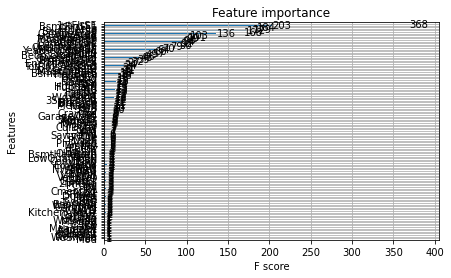

In [61]:
xgboost.plot_importance(model_xgboost) # график важности признаков

# RandomForest

RandomForest - это метаоценщик, который подходит к ряду классификационных деревьев решений по различным подвыборкам набора данных и использует усреднение для повышения точности прогнозирования и контроля соответствия. 

In [41]:
%%time
model_rf = RandomForestRegressor()
model_rf.fit(X_train_check, y_train_check)

Wall time: 2.86 s


RandomForestRegressor()

In [42]:
pred_rf = model_rf.predict(X_test_check)
rf_rmse = np.sqrt(mean_squared_error(y_test_check, pred_rf))
model_error['RandomForest'] = rf_rmse
print(rf_rmse)

31529.394360060323


# LightGBM

Light GBM - это платформа для повышения градиента, использующая алгоритм обучения на основе дерева.

In [43]:
model_lgbm = LGBMRegressor()
model_lgbm.fit(X_train_check, y_train_check)

LGBMRegressor()

In [44]:
pred_lgbm = model_lgbm.predict(X_test_check)
lgbm_rmse = np.sqrt(mean_squared_error(y_test_check, pred_lgbm))
model_error['LightGBM'] = lgbm_rmse
print(lgbm_rmse)

31145.808049662723


Посмотрим на то как алгоритмы работают "из коробки"

In [45]:
full_rmse = 0
for key, value in model_error.items():
  full_rmse += value
  print("RMSE ошибка модели {} - {}".format(key, str(value)))
print("Среднее качество моделей - {}".format(str(full_rmse / len(model_error))))

RMSE ошибка модели LinearRegression - 39386.706846122965
RMSE ошибка модели SGDRegressor - 7.982391843968525e+16
RMSE ошибка модели Ridge - 34176.85979024935
RMSE ошибка модели Lasso - 38926.66168394305
RMSE ошибка модели XGBoost - 31432.89700941018
RMSE ошибка модели RandomForest - 31529.394360060323
RMSE ошибка модели LightGBM - 31145.808049662723
Среднее качество моделей - 1.1403416919984554e+16


# Создадим файл с ответом

In [46]:
pred_for_sub = model_xgboost.predict(X_test_check)
len(pred_for_sub)

482

In [51]:
result = pd.DataFrame({'SalePrice':pred_for_sub})
result

,SalePrice
0,140550.328125
1,288277.843750
2,122713.500000
3,171911.593750
4,334024.812500
...,...
477,125310.804688
478,122839.648438
479,227594.781250
480,128591.789062


In [ ]:
result.to_csv("resul.csv", index=False)